In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Lead_df=pd.read_csv(r"C:\Users\charu\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
Lead_df.shape

(9240, 37)

In [8]:
# check if duplicates in primary fields -- Prospect ID   and  Lead Number
Lead_df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [9]:
Lead_df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

In [10]:
#no duplicates in those fields and as those are ID fileds, it can be dropped
Lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# EDA 


### Cleaning Data

In [12]:
#Checking unique vales
Lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [13]:
#Drop those unique vales
Lead_df = Lead_df.drop(['Magazine'],1)

In [14]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
Lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [16]:
Lead_df = Lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [17]:
# NULL check
Lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [18]:
round(100*(Lead_df.isnull().sum())/len(Lead_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [19]:
# drop those columns with >40% NULL
Lead_df = Lead_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)


In [20]:
round(100*(Lead_df.isnull().sum())/len(Lead_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [21]:
# those with >25% seems to be relevant as the they are Country,Lead Profile and some important questions.
#So keep those columns as such

In [22]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [23]:
# Replacing those NULL values with Default values
Lead_df['Country'] = Lead_df['Country'].fillna('Not Available')
Lead_df['Specialization'] = Lead_df['Specialization'].fillna('Not Available')
Lead_df['How did you hear about X Education'] = Lead_df['How did you hear about X Education'].fillna('Not Available')
Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].fillna('Not Available')
Lead_df['What matters most to you in choosing a course'] = Lead_df['What matters most to you in choosing a course'].fillna('Not Available')
Lead_df['Tags'] = Lead_df['Tags'].fillna('Not Available')
Lead_df['Lead Profile'] = Lead_df['Lead Profile'].fillna('Not Available')
Lead_df['City'] = Lead_df['City'].fillna('Not Available')


In [24]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [25]:
round(100*(Lead_df.isnull().sum()/len(Lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [26]:
Lead_df.shape

(9240, 25)

#####Categorical Attribute

In [27]:
Lead_df['Country'].value_counts()

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [28]:
# We can categories as In- India and Foreign countries
def slots(x):
    i = ""
    if x == "India":
        i = "India"
    elif x == "Not Available":
        i = "Not Available"
    else:
        i = "Foreign Countries"
    return i

Lead_df['Country'] = Lead_df.apply(lambda x:slots(x['Country']), axis = 1)
Lead_df['Country'].value_counts()

India                6492
Not Available        2461
Foreign Countries     287
Name: Country, dtype: int64

In [29]:
# As almst 70% values for country=India, replacing default values with 'India'
Lead_df['Country'] = Lead_df['Country'].replace('Not Available','India')
Lead_df['Country'].value_counts()

India                8953
Foreign Countries     287
Name: Country, dtype: int64

In [30]:
Lead_df = Lead_df[Lead_df.isnull().sum(axis=1) <1]

In [31]:
round(100*(Lead_df.isnull().sum()/len(Lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [32]:
# No null values now

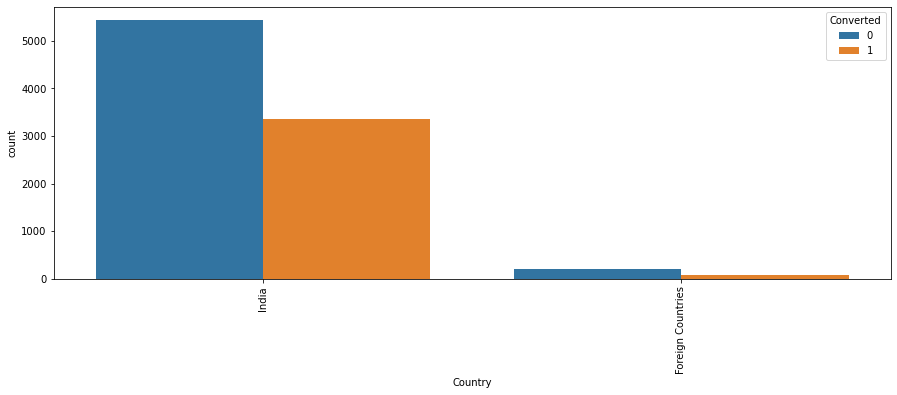

In [33]:
###Ploting - Country
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_df.Country, hue=Lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
# Country can be dropped as its almost 98-99% value is 'Within India'
Lead_df = Lead_df.drop(['Country'],1)

In [35]:
#City - Check the distinct values and count
Lead_df['City'].value_counts(dropna=False)

Mumbai                         3177
Select                         2156
Not Available                  1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

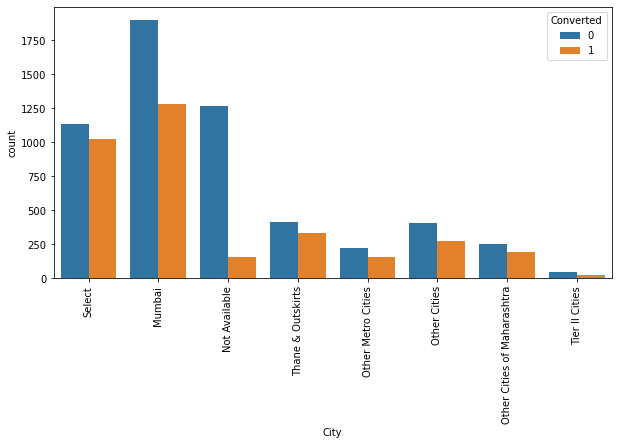

In [36]:
plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_df.City, hue=Lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
Lead_df['City'] = Lead_df['City'].replace('Select','Not Available')

In [38]:
Lead_df['City'].value_counts(dropna=False)

Not Available                  3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

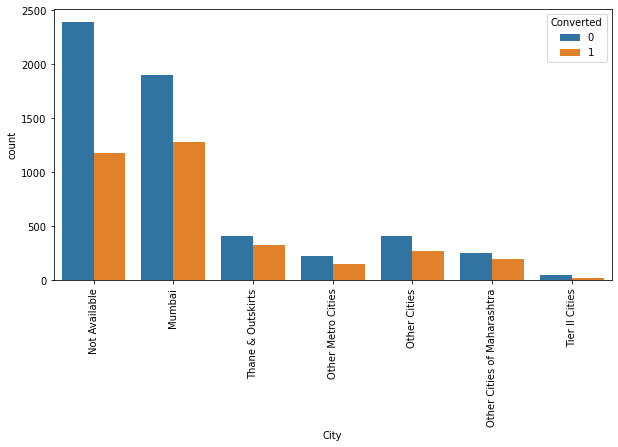

In [39]:
plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_df.City, hue=Lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

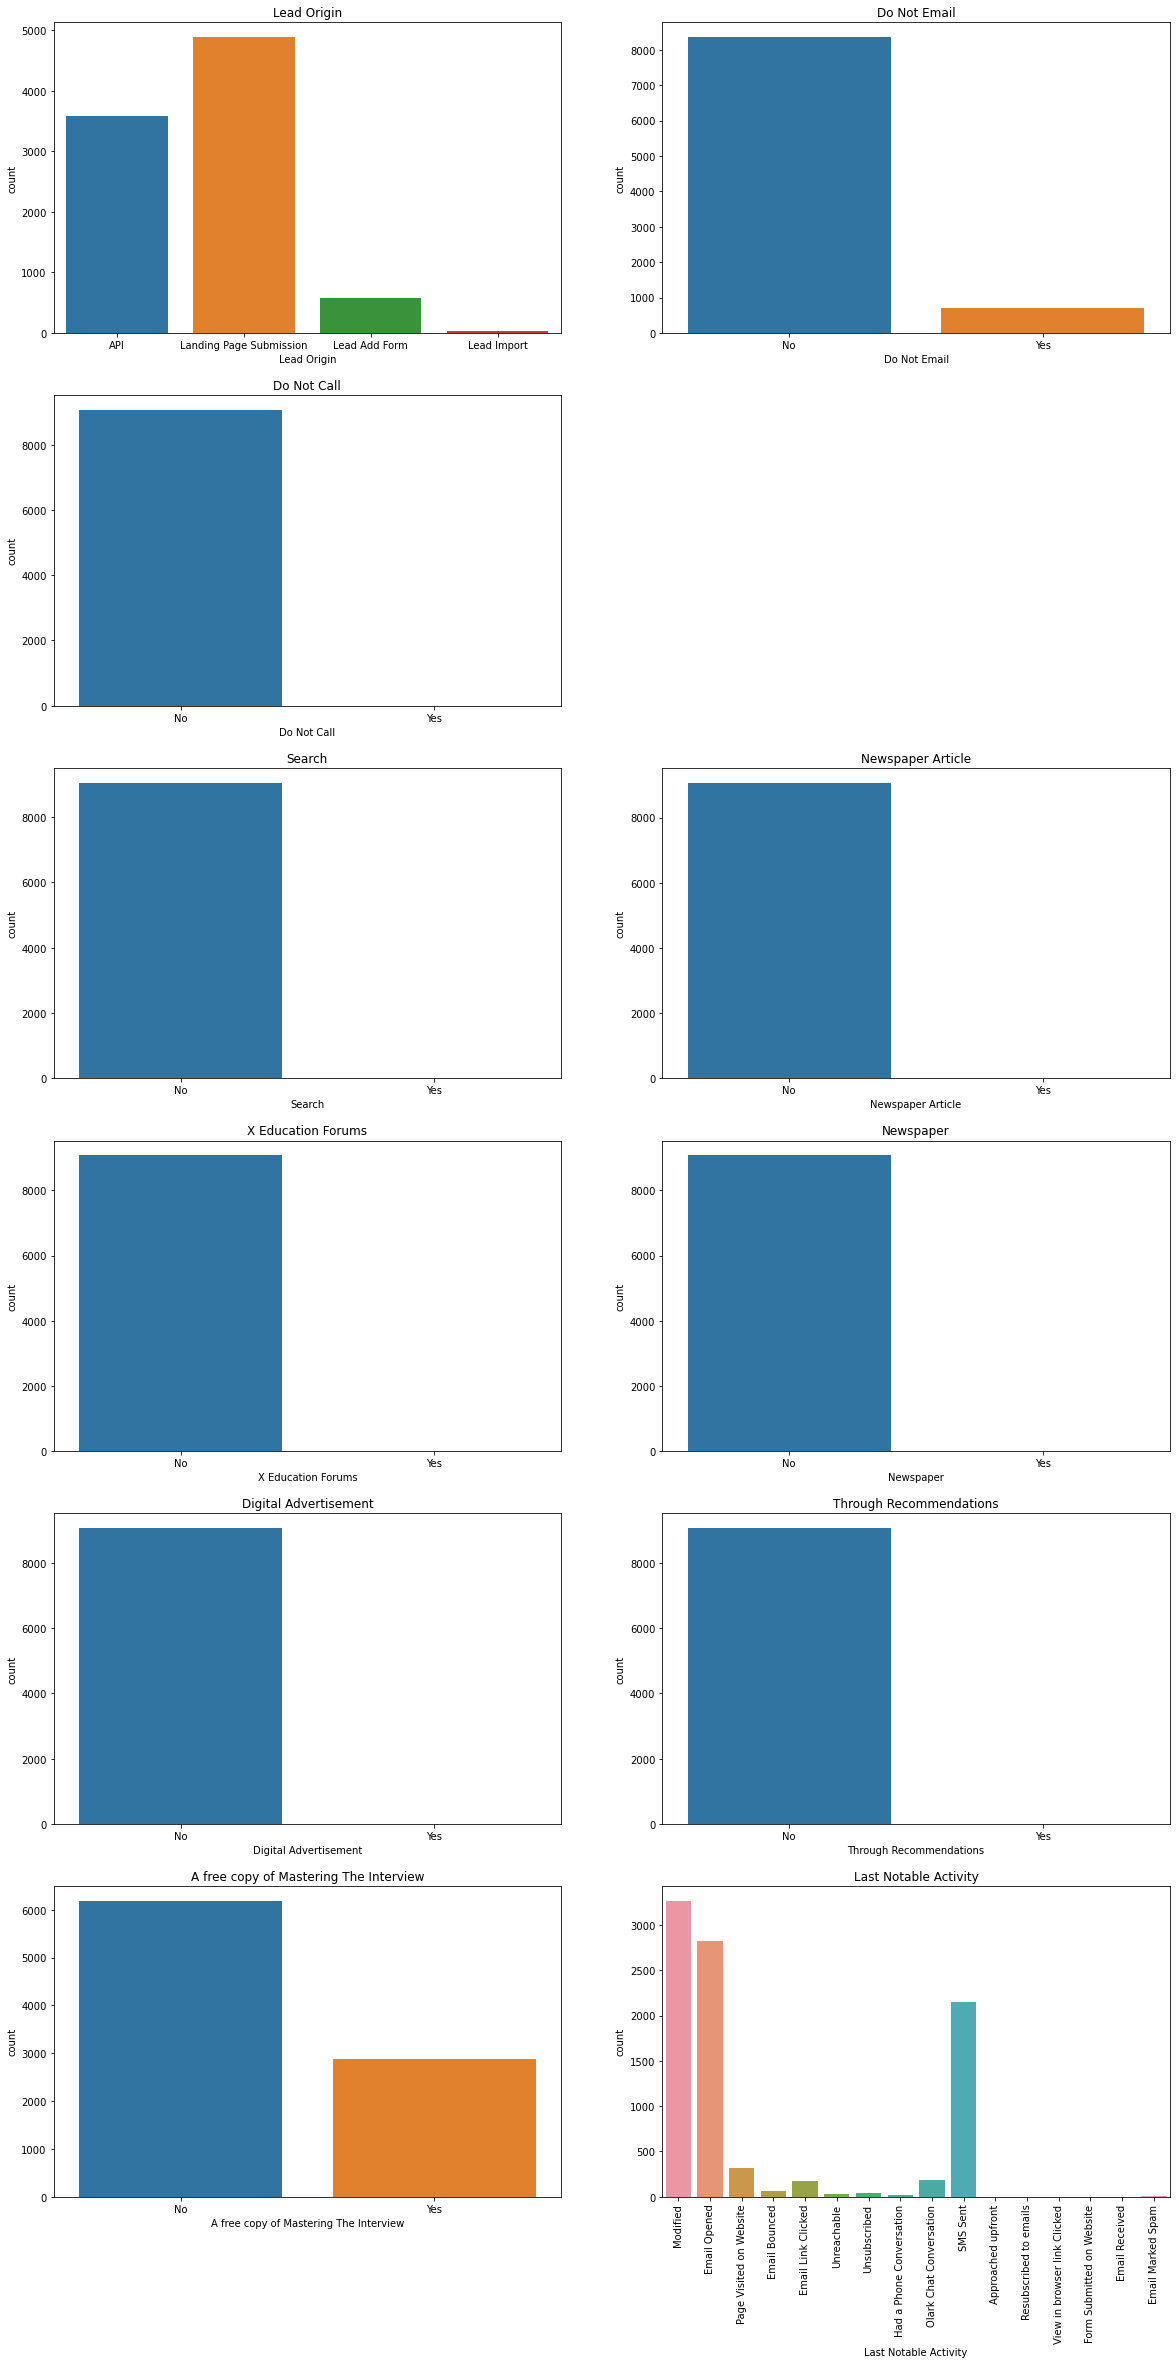

In [40]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Lead_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(Lead_df['Search'])
plt.title('Search')
plt.subplot(6,2,6)
sns.countplot(Lead_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Lead_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Lead_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.subplot(6,2,12)
sns.countplot(Lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

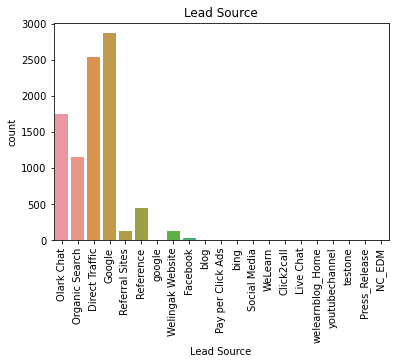

In [41]:
sns.countplot(Lead_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

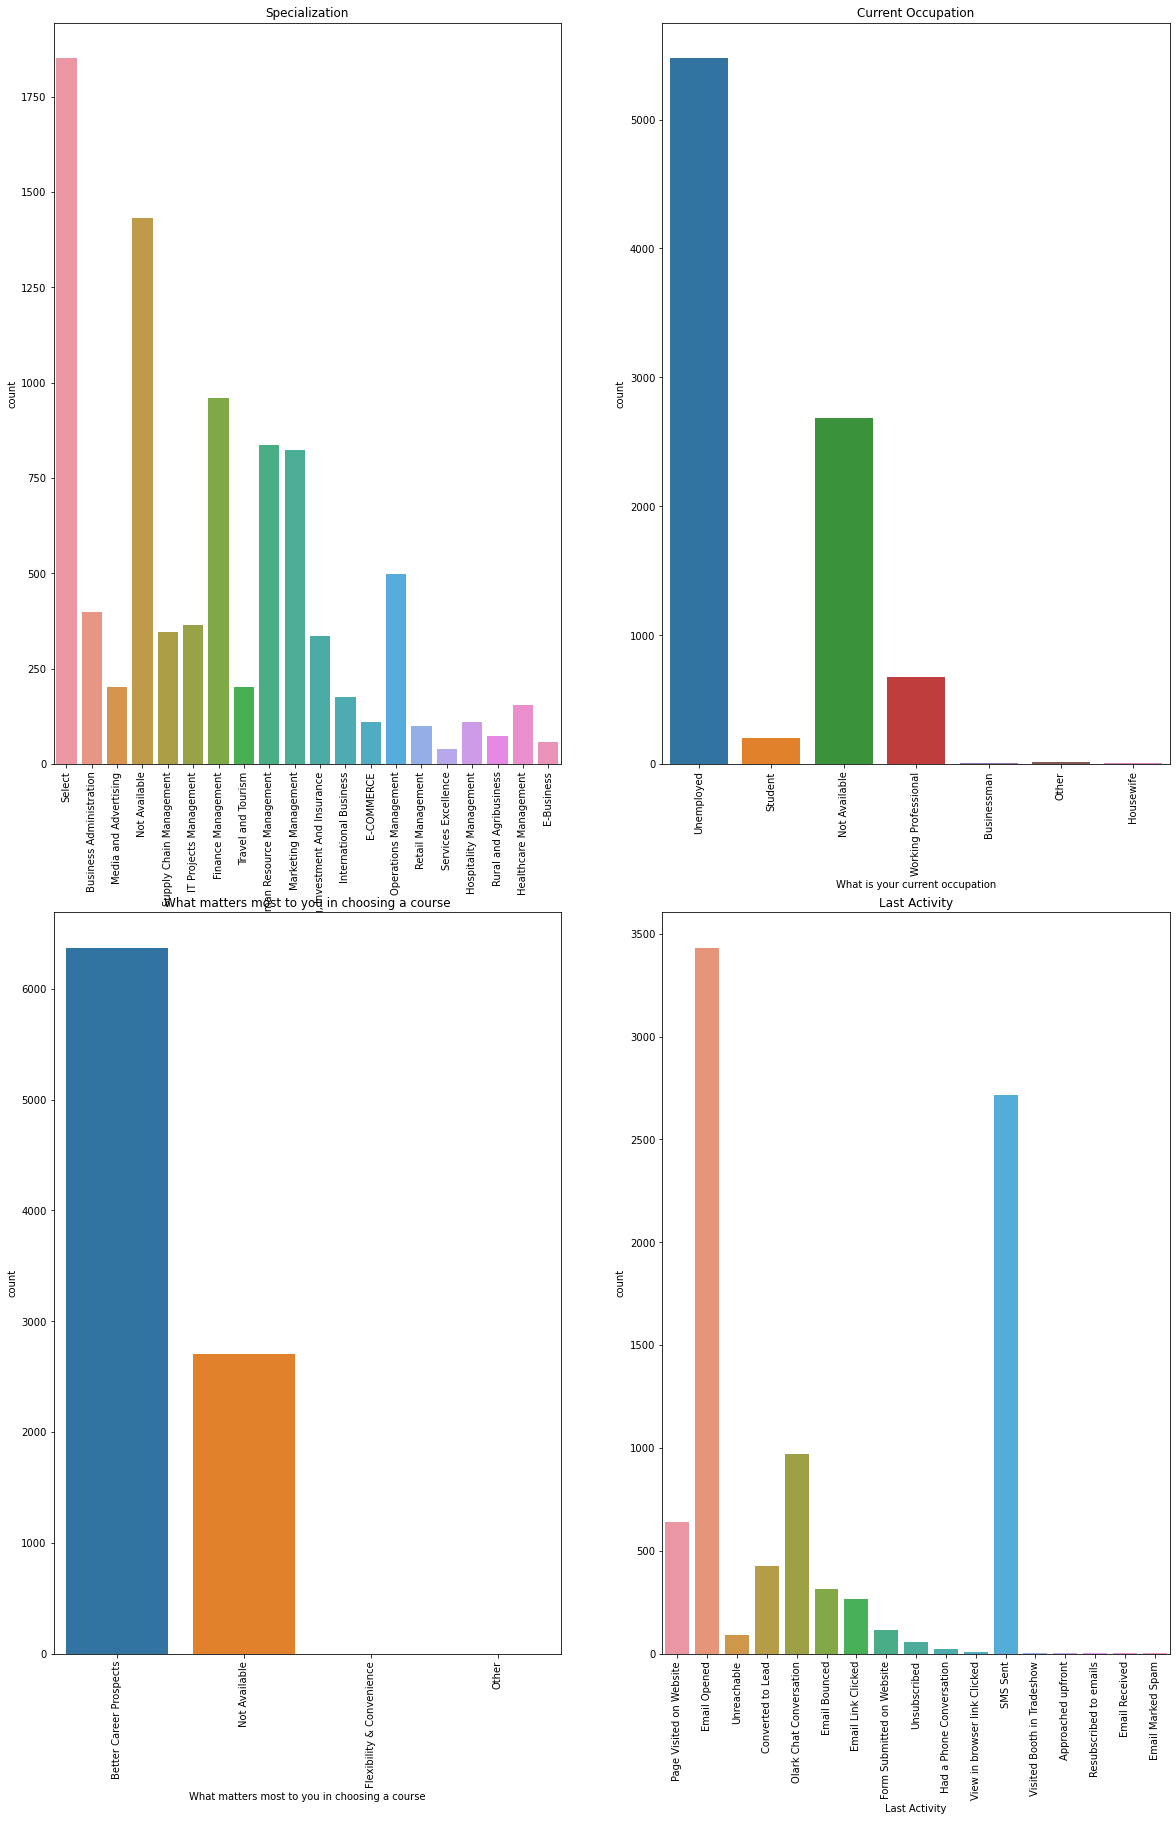

In [42]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Lead_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Lead_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Lead_df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Lead_df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

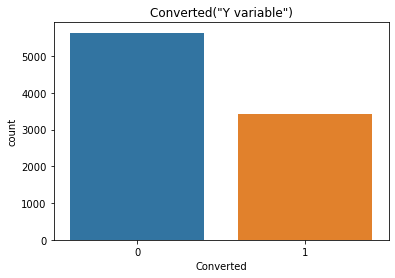

In [43]:
sns.countplot(Lead_df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

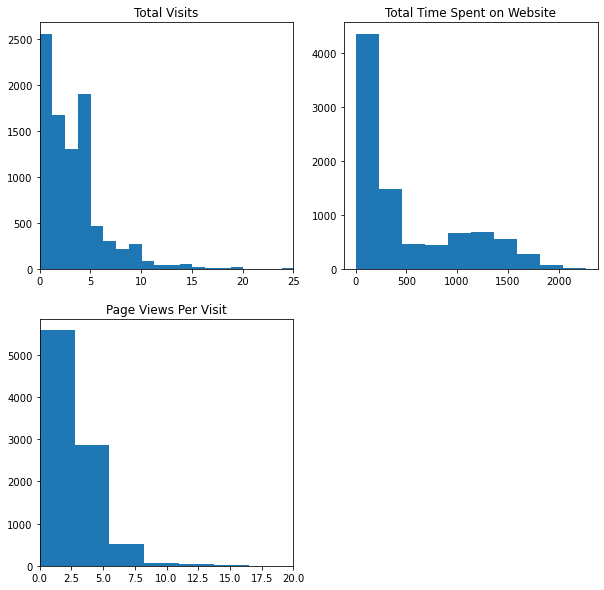

In [44]:
#####NUmerical variable

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( ) 

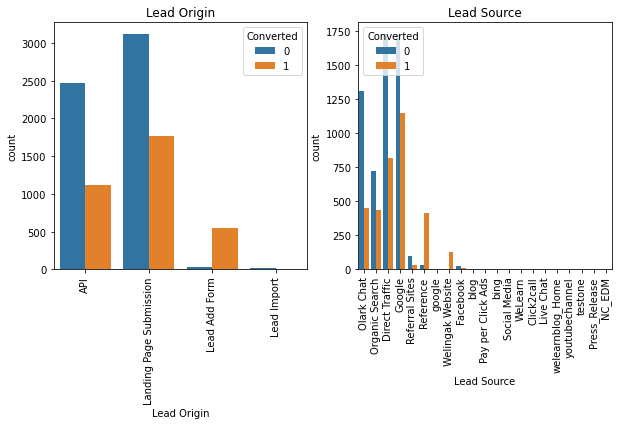

In [45]:
###Categorical variable to converted

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

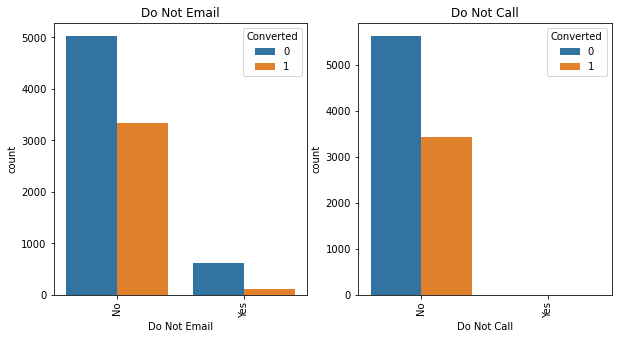

In [46]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

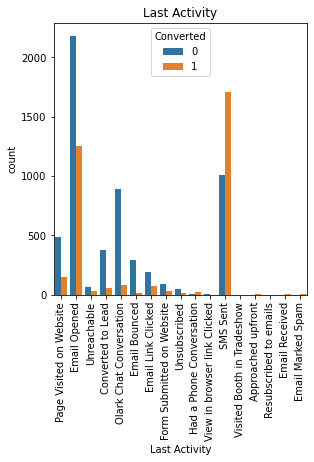

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')


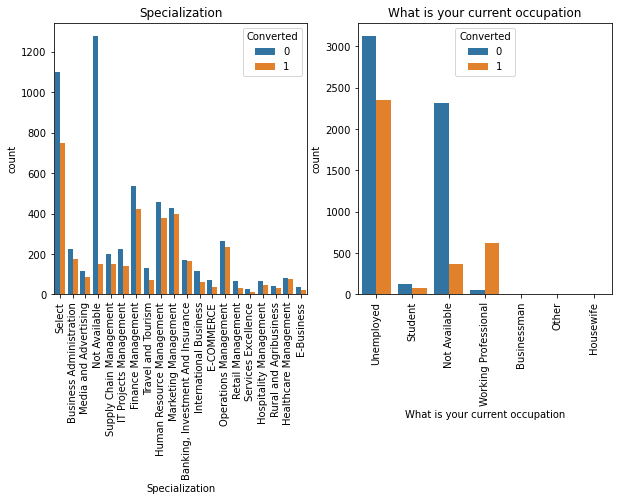

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

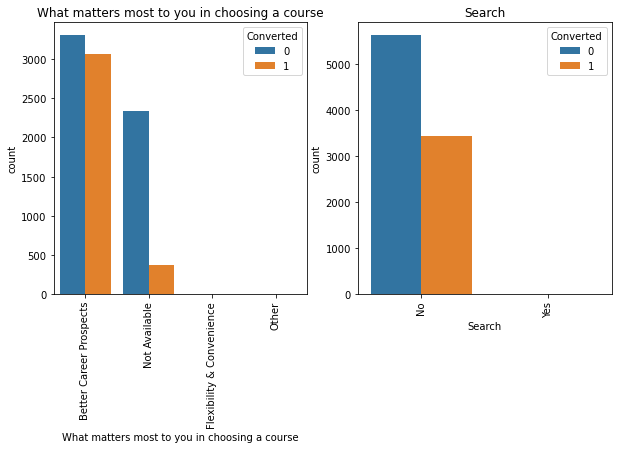

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

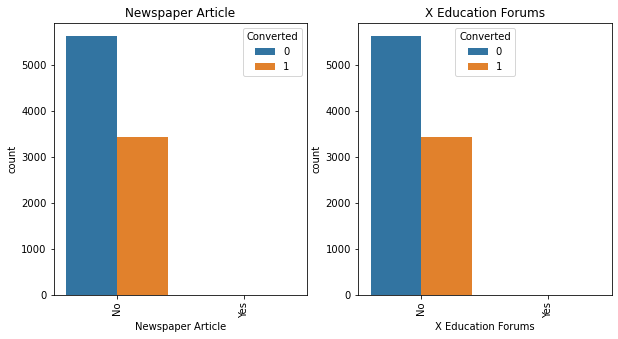

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

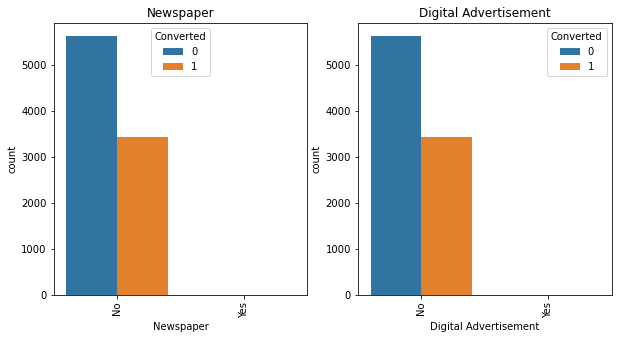

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

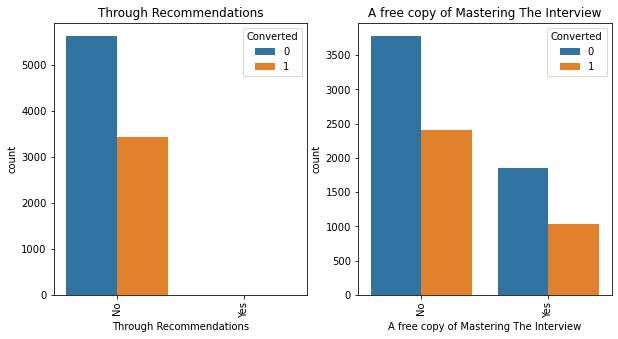

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

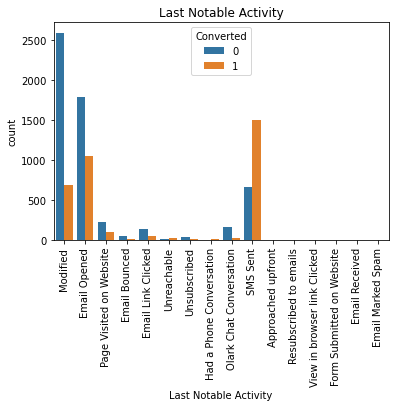

In [53]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

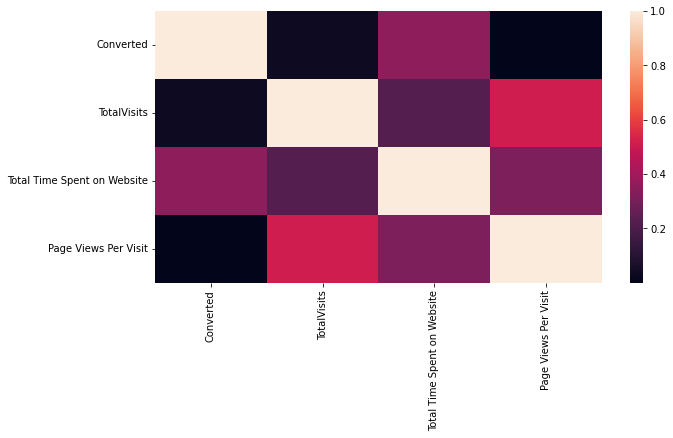

In [54]:
#correlation 
plt.figure(figsize=(10,5))
sns.heatmap(Lead_df.corr())
plt.show()

Severalfields with less data and probably with no relevance

In [55]:
# Outliner checks
ol1 = Lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
ol1.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


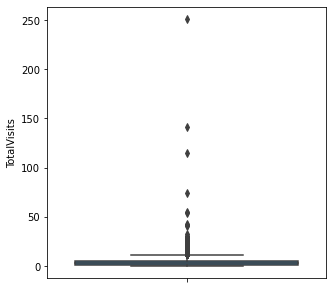

In [56]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_df['TotalVisits'])
plt.show()

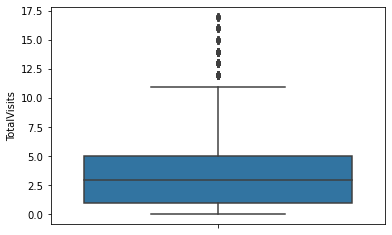

In [57]:
# Outliners are there for Total Vist
#Hence remove top 1%
OUTL2 = Lead_df.TotalVisits.quantile(0.99)
Lead_df = Lead_df[(Lead_df.TotalVisits <= OUTL2)]
OUTL1 = Lead_df.TotalVisits.quantile(0.01)
Lead_df = Lead_df[(Lead_df.TotalVisits >= OUTL1)]
sns.boxplot(y=Lead_df['TotalVisits'])
plt.show()

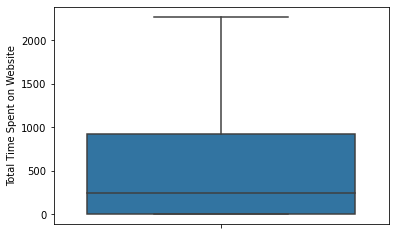

In [58]:
sns.boxplot(y=Lead_df['Total Time Spent on Website'])
plt.show()

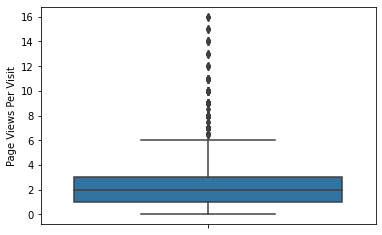

In [59]:
sns.boxplot(y=Lead_df['Page Views Per Visit'])
plt.show()

Checking if any more fields can be dropped

In [60]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [61]:
Lead_df['Tags']

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                          Not Available
9239    Will revert after reading the email
Name: Tags, Length: 8991, dtype: object

In [62]:
# Looks like 'Tags' are predicted actions added not by end customers but by internal team. So removing the same.
Lead_df.drop(['Tags'], 1, inplace = True)
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,Not Available,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,Not Available,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Select,Mumbai,No,Modified


In [63]:
#getting a list of categorical columns

cat_cols= Lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

Dummy Variable setting 

In [64]:
# Create dummy variables using the 'get_dummies'
d = pd.get_dummies(Lead_df[['Lead Origin' ,'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
dummy = pd.concat([Lead_df, d], axis=1)
dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [65]:
dummy = dummy.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Lead Profile,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,Select,Select,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,Select,Select,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,Select,Potential Lead,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,Word Of Mouth,Select,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,Other,Select,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,Select,Potential Lead,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,Select,Potential Lead,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,Select,Potential Lead,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,Online Search,Not Available,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
dummy = dummy.drop(['How did you hear about X Education','Lead Profile'],1)
dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Test Train Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# variable in Y
y = dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Dataset split -->  70% - train    ,   30% - test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Build Model

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE


In [73]:
rfe = RFE(lr,n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

In [74]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 27),
 ('Lead Source_google', False, 25),
 ('Lead Source_testone', False, 30),
 ('Lead Source_welearnblog_Home', False, 63),
 (

In [75]:
# Keep all the columns selected by RFE in a new variable 'col'
col = X_train.columns[rfe.support_]

In [76]:
#All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [77]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [78]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.5
Date:                Mon, 23 Jan 2023   Deviance:                       5005.1
Time:                        18:26:52   Pearson chi2:                 6.39e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6686      0.116     -5.772      0.000      -0.896      -0.442
TotalVisits                                              1.8038      0.304      5.928      0.000       1.207       2.400
Total Time Spent on Website                              4.7033      0.173     27.150      0.000       4.364       5.043
Page Views Per Visit                                    -2.2755      0.451     -5.050      0.000      -3.159      -1.392
Lead Origin_Lead Add Form                                3.9685      0.262     15.148      0.000       3.455       4.482
Lead Source_Olark Chat                                   1.3600      0.129     10.533      0.000       1.107       1.613
Lead Source_Welingak Website                             2.4555      1.038      2.365      0.018       0.421       4.490
Do Not Email_Yes                                        -1.4682      0.206     -7.122      0.000      -1.872      -1.064
Last Activity_Converted to Lead                         -0.8878      0.216     -4.110      0.000      -1.311      -0.464
Last Activity_Email Bounced                             -1.2359      0.393     -3.141      0.002      -2.007      -0.465
Last Activity_Form Submitted on Website                 -0.7945      0.371     -2.144      0.032      -1.521      -0.068
Last Activity_Olark Chat Conversation                   -1.4164      0.198     -7.144      0.000      -1.805      -1.028
What is your current occupation_Housewife               23.0830   2.96e+04      0.001      0.999    -5.8e+04    5.81e+04
What is your current occupation_Not Available           -1.0464      0.089    -11.790      0.000      -1.220      -0.872
What is your current occupation_Working Professional     2.5363      0.192     13.230      0.000       2.161       2.912
Last Notable Activity_Email Link Clicked                -1.9623      0.269     -7.289      0.000      -2.490      -1.435
Last Notable Activity_Email Opened                      -1.3566      0.091    -14.985      0.000      -1.534      -1.179
Last Notable Activity_Had a Phone Conversation          22.2796   2.19e+04      0.001      0.999   -4.29e+04    4.29e+04
Last Notable Activity_Modified                          -1.5201      0.106    -14.390      0.000      -1.727      -1.313
Last Notable Activity_Olark Chat Conversation           -1.2325      0.385     -3.202      0.001      -1.987      -0.478
Last Notable Activity_Page Visited on Website           -2.0381      0.220     -9.251      0.000      -2.470      -1.606
========================================================================================================================
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.35
0,TotalVisits,5.32
17,Last Notable Activity_Modified,2.82
10,Last Activity_Olark Chat Conversation,2.09
1,Total Time Spent on Website,1.99
6,Do Not Email_Yes,1.91
8,Last Activity_Email Bounced,1.88
15,Last Notable Activity_Email Opened,1.81
4,Lead Source_Olark Chat,1.78
12,What is your current occupation_Not Available,1.58


In [81]:
# VIF values looks almost ok...but few are with p-value >98%
# remove 'What is your current occupation_Housewife' and 'Last Notable Activity_Had a Phone Conversation'

X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [82]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.8
Date:                Mon, 23 Jan 2023   Deviance:                       5015.6
Time:                        18:26:53   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6573      0.116     -5.683      0.000      -0.884      -0.431
TotalVisits                                              1.8080      0.303      5.964      0.000       1.214       2.402
Total Time Spent on Website                              4.7016      0.173     27.168      0.000       4.362       5.041
Page Views Per Visit                                    -2.2841      0.450     -5.078      0.000      -3.166      -1.402
Lead Origin_Lead Add Form                                3.9876      0.262     15.239      0.000       3.475       4.500
Lead Source_Olark Chat                                   1.3539      0.129     10.493      0.000       1.101       1.607
Lead Source_Welingak Website                             2.4298      1.038      2.340      0.019       0.395       4.465
Do Not Email_Yes                                        -1.4762      0.206     -7.157      0.000      -1.880      -1.072
Last Activity_Converted to Lead                         -0.8939      0.216     -4.140      0.000      -1.317      -0.471
Last Activity_Email Bounced                             -1.2351      0.394     -3.138      0.002      -2.006      -0.464
Last Activity_Form Submitted on Website                 -0.7998      0.371     -2.158      0.031      -1.526      -0.073
Last Activity_Olark Chat Conversation                   -1.4188      0.198     -7.156      0.000      -1.807      -1.030
What is your current occupation_Not Available           -1.0515      0.089    -11.848      0.000      -1.225      -0.878
What is your current occupation_Working Professional     2.5322      0.192     13.209      0.000       2.156       2.908
Last Notable Activity_Email Link Clicked                -1.9563      0.267     -7.319      0.000      -2.480      -1.432
Last Notable Activity_Email Opened                      -1.3619      0.090    -15.061      0.000      -1.539      -1.185
Last Notable Activity_Modified                          -1.5230      0.105    -14.436      0.000      -1.730      -1.316
Last Notable Activity_Olark Chat Conversation           -1.2357      0.385     -3.209      0.001      -1.990      -0.481
Last Notable Activity_Page Visited on Website           -2.0469      0.220     -9.294      0.000      -2.479      -1.615
========================================================================================================================
"""

In [83]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.35
0,TotalVisits,5.32
15,Last Notable Activity_Modified,2.82
10,Last Activity_Olark Chat Conversation,2.09
1,Total Time Spent on Website,1.99
6,Do Not Email_Yes,1.91
8,Last Activity_Email Bounced,1.88
14,Last Notable Activity_Email Opened,1.81
4,Lead Source_Olark Chat,1.78
11,What is your current occupation_Not Available,1.58


In [84]:
#Drop 'Page Views Per Visit'
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.9
Date:                Mon, 23 Jan 2023   Deviance:                       5041.8
Time:                        18:26:54   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4084
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9108      0.104     -8.723      0.000      -1.115      -0.706
TotalVisits                                              0.9284      0.249      3.733      0.000       0.441       1.416
Total Time Spent on Website                              4.6891      0.173     27.158      0.000       4.351       5.028
Lead Origin_Lead Add Form                                4.2166      0.258     16.330      0.000       3.710       4.723
Lead Source_Olark Chat                                   1.5701      0.122     12.823      0.000       1.330       1.810
Lead Source_Welingak Website                             2.4287      1.038      2.339      0.019       0.394       4.464
Do Not Email_Yes                                        -1.5028      0.205     -7.343      0.000      -1.904      -1.102
Last Activity_Converted to Lead                         -0.8095      0.216     -3.754      0.000      -1.232      -0.387
Last Activity_Email Bounced                             -1.1371      0.390     -2.915      0.004      -1.902      -0.372
Last Activity_Form Submitted on Website                 -0.7653      0.372     -2.058      0.040      -1.494      -0.037
Last Activity_Olark Chat Conversation                   -1.3862      0.198     -7.008      0.000      -1.774      -0.999
What is your current occupation_Not Available           -1.0451      0.088    -11.813      0.000      -1.219      -0.872
What is your current occupation_Working Professional     2.5262      0.191     13.195      0.000       2.151       2.901
Last Notable Activity_Email Link Clicked                -1.8975      0.265     -7.158      0.000      -2.417      -1.378
Last Notable Activity_Email Opened                      -1.3271      0.090    -14.775      0.000      -1.503      -1.151
Last Notable Activity_Modified                          -1.5049      0.105    -14.322      0.000      -1.711      -1.299
Last Notable Activity_Olark Chat Conversation           -1.1595      0.379     -3.056      0.002      -1.903      -0.416
Last Notable Activity_Page Visited on Website           -1.8267      0.212     -8.600      0.000      -2.243      -1.410
========================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,2.73
0,TotalVisits,2.58
9,Last Activity_Olark Chat Conversation,2.09
1,Total Time Spent on Website,1.93
5,Do Not Email_Yes,1.89
7,Last Activity_Email Bounced,1.87
13,Last Notable Activity_Email Opened,1.76
3,Lead Source_Olark Chat,1.75
10,What is your current occupation_Not Available,1.57
2,Lead Origin_Lead Add Form,1.52


In [87]:
# VIF looks okay and P-value is <0.05

Finalize the model

## Prediction

In [88]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.385082
3267    0.996778
5653    0.441761
5072    0.152786
3704    0.139773
1790    0.058475
2482    0.222528
1694    0.131167
8768    0.123066
9225    0.008215
dtype: float64

In [89]:
#  Make array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38508225, 0.99677819, 0.44176062, 0.15278621, 0.13977268,
       0.05847522, 0.22252797, 0.13116738, 0.12306559, 0.00821455])

In [90]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.385082
1,1,0.996778
2,1,0.441761
3,0,0.152786
4,0,0.139773


In [91]:
# >0.5 to 1 and <0.5 to 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.385082,0
1,1,0.996778,1
2,1,0.441761,0
3,0,0.152786,0
4,0,0.139773,0


# Model analysis

In [92]:
from sklearn import metrics
# make conclusion matrix
final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
final

array([[3492,  423],
       [ 717, 1661]], dtype=int64)

In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8188463372000636

### Accuracy --> 82%

In [94]:
# Substituting the value of true positive
TP = final[1,1]
# Substituting the value of true negatives
TN = final[0,0]
# Substituting the value of false positives
FP = final[0,1] 
# Substituting the value of false negatives
FN = final[1,0]

In [95]:
# Sensitivity
TP/(TP+FN)

0.6984861227922624

In [96]:
#Specificity
TN/(TN+FP)

0.8919540229885058

##  Receiver Operating Characteristic curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve --> area = %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

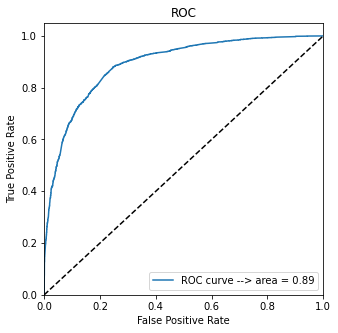

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
#Area for ROC curve is .89

In [99]:
# Diff Prob cuttoff build
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.385082,0,1,1,1,1,0,0,0,0,0,0
1,1,0.996778,1,1,1,1,1,1,1,1,1,1,1
2,1,0.441761,0,1,1,1,1,1,0,0,0,0,0
3,0,0.152786,0,1,1,0,0,0,0,0,0,0,0
4,0,0.139773,0,1,1,0,0,0,0,0,0,0,0


In [100]:
# Creating a df to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.628635,0.970984,0.420690
0.2,0.2,0.766884,0.909167,0.680460
0.3,0.3,0.801208,0.873423,0.757344
0.4,0.4,0.815509,0.777124,0.838825
0.5,0.5,0.818846,0.698486,0.891954
0.6,0.6,0.809948,0.624895,0.922350
0.7,0.7,0.786270,0.511775,0.953001
0.8,0.8,0.764500,0.427250,0.969349
0.9,0.9,0.719212,0.275442,0.988761


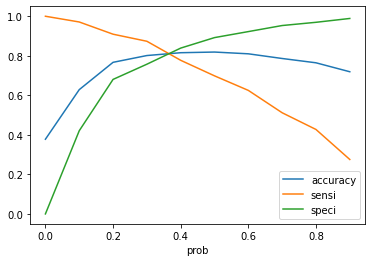

In [101]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [103]:
#Optimal cutoff is somewhere  slightly>=0.35 --->considering 0.375
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.385082,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.996778,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.441761,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.152786,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.139773,0,1,1,0,0,0,0,0,0,0,0,0


In [104]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140791355474336

In [105]:
# Creating  matrix2 
final2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
final2

array([[3238,  677],
       [ 493, 1885]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = final2[1,1]
# Substituting the value of true negatives
TN = final2[0,0]
# Substituting the value of false positives
FP = final2[0,1] 
# Substituting the value of false negatives
FN = final2[1,0]

In [107]:
# Calculating the sensitivity
TP/(TP+FN)

0.7926829268292683

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.8270753512132822

In [109]:
# When Cut off = 0.375 ===> accuracy, sensitivity and specificity of around 80%

# Final recommendation - Conclusion

In [110]:
##### Top 10 parameters mostly to be considered are as below( In decreasing order of importance)

# 0	TotalVisits  	2.58
# 1	Total Time Spent on Website      	1.93
# 2	Lead Origin_Lead Add Form	        1.52


# 3	Lead Source_Olark Chat          	1.75
# 4	Lead Source_Welingak Website     	1.34
# 5	Do Not Email_Yes	                1.89
# 6	Last Activity_Converted to Lead  	1.29
# 7	Last Activity_Email Bounced     	1.87
# 8	Last Activity_Form Submitted on Website	  1.06
# 9	Last Activity_Olark Chat Conversation	  2.09
# 10 What is your current occupation_Not Available	1.57
